In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, precision_recall_curve, \
average_precision_score
from inspect import signature

from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn.tree import export_graphviz
from six import StringIO 

In [3]:
masterprojekt_daten = pd.read_csv("./Messergebnisse_merged.csv")
masterprojekt_daten = masterprojekt_daten.drop(columns=['Unnamed: 0', 'timeStamp'], axis=0)
#print(masterprojekt_daten.columns, masterprojekt_daten.dtypes)

#print(masterprojekt_daten.dtypes)

In [4]:
x = masterprojekt_daten.drop(columns=['Klassifizierung nach Messschraube'])
y = masterprojekt_daten['Klassifizierung nach Messschraube']

x.shape, y.shape

((810, 23), (810,))

In [15]:
X_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=78678)

In [16]:
dec_tree = tree.DecisionTreeClassifier(max_depth=5)
dec_tree = dec_tree.fit(X_train, y_train)

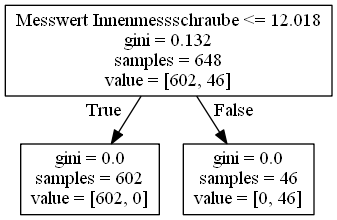

In [17]:
dot_data = StringIO()
export_graphviz(dec_tree, out_file=dot_data, feature_names=X_train.columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [18]:
y_pred = dec_tree.predict(x_test)
y_probs = dec_tree.predict_proba(x_test)

In [19]:
print('Cross validation of the Data set: ', cross_val_score(dec_tree, x, y, verbose=3))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

[CV]  ................................................................
[CV] .................................... , score=1.000, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=1.000, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=1.000, total=   0.0s
Cross validation of the Data set:  [1. 1. 1.]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


C:\Users\MLDigitalLab\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


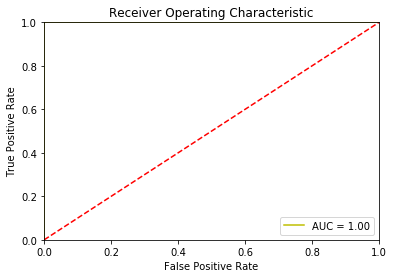

In [20]:
probabilities = y_probs[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

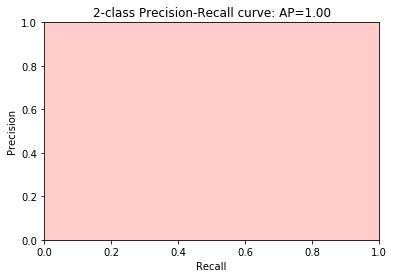

In [13]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

[Text(0, 0.5, 'i.O.'), Text(0, 1.5, 'n.I.O.')]

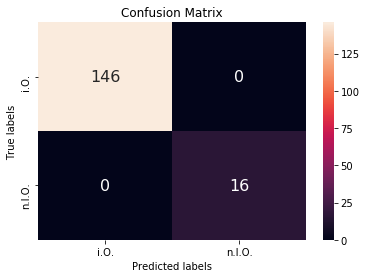

In [21]:
import sklearn
matrix = confusion_matrix(y_test, y_pred)
class_names = masterprojekt_daten.columns
ax = plt.subplot()

# plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot=True, fmt='d', ax = ax, annot_kws={"size": 16})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['i.O.', 'n.I.O.']); ax.yaxis.set_ticklabels(['i.O.', 'n.I.O.'])
#ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))